<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/572_hw1_put.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective is to get familiar with model calibration.
- download  today's call option prices of your favorite stock with maturity $T_1$ and several near the money strikes $(K_1, \ldots, K_n)$.
- compute IV with your bsm price engine for each option price. You are going to use USD Libor 3-month for your interest rate input. 
- plot a figure of strike v.s. IV. Do you find any volatility smile? 
- calibrate bsm volatility for the option prices, denote it by $\hat \sigma$. You may use any error function for the calibration purpose.
- reproduce option prices using your price engine with calibrated volatility, then compare how close they are to the market prices.


In [11]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

Cloning into '19ma573ZiyueNie'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 225 (delta 25), reused 0 (delta 0), pack-reused 155
Receiving objects: 100% (225/225), 390.05 KiB | 15.00 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [12]:
cd 19ma573ZiyueNie/src/

/content/19ma573ZiyueNie/src/19ma573ZiyueNie/src/19ma573ZiyueNie/src


In [0]:
from european_options import VanillaOption
from gbm import Gbm

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
import scipy.stats as ss


In [15]:
'''======
Read data
========='''
#Read four-column data
#columns are otype, maturity, strike, option_price
call_option_data1 = pd.read_csv('SBUX_put.csv')

print('>>>>>>Starbucks_put data')
print(call_option_data1)

>>>>>>Starbucks_call data
          Contract Name         Last Trade Date  Strike  Last Price    Bid  \
0   SBUX190621P00030000   2019-01-31 2:03PM EST    30.0        0.03   0.00   
1   SBUX190621P00035000  2019-01-16 11:08AM EST    35.0        0.05   0.01   
2   SBUX190621P00040000  2019-01-31 12:42PM EST    40.0        0.05   0.03   
3   SBUX190621P00043000  2019-02-05 11:45AM EST    43.0        0.08   0.05   
4   SBUX190621P00045000   2019-02-05 3:30PM EST    45.0        0.10   0.06   
5   SBUX190621P00047000   2019-02-05 3:58PM EST    47.0        0.12   0.12   
6   SBUX190621P00050000   2019-02-05 3:45PM EST    50.0        0.18   0.16   
7   SBUX190621P00052500  2019-02-05 10:47AM EST    52.5        0.30   0.25   
8   SBUX190621P00055000   2019-02-05 3:17PM EST    55.0        0.38   0.38   
9   SBUX190621P00057500   2019-02-05 3:17PM EST    57.5        0.59   0.57   
10  SBUX190621P00060000   2019-02-05 3:49PM EST    60.0        0.88   0.85   
11  SBUX190621P00062500   2019-02-05 3

In [16]:
data2 = call_option_data1.drop(['Contract Name','Last Trade Date','Bid','Ask','Change','% Change', 'Volume','Open Interest', 'Implied Volatility'], axis=1,inplace=False) 
print(data2)


    Strike  Last Price
0     30.0        0.03
1     35.0        0.05
2     40.0        0.05
3     43.0        0.08
4     45.0        0.10
5     47.0        0.12
6     50.0        0.18
7     52.5        0.30
8     55.0        0.38
9     57.5        0.59
10    60.0        0.88
11    62.5        1.31
12    65.0        1.91
13    67.5        2.76
14    70.0        3.90
15    72.5        5.80
16    75.0        7.80
17    77.5        9.50
18    85.0       20.70


In [17]:
'''=========
Tips for time length
============='''

today = np.datetime64('2019-02-04')
maturity = np.datetime64('2019-06-21')
time_to_maturity_days = maturity - today

time_to_maturity_years = time_to_maturity_days/np.timedelta64(1,'D')/365
T_1=time_to_maturity_years 
print('--->>>>>time to maturity in years is ' + str(time_to_maturity_years))

--->>>>>time to maturity in years is 0.37534246575342467


In [0]:
'''==============
below are from the market data for underlying process
================='''
Int_rates=2.73263/100.0   #3 month US Dollar LIBOR interest rate
gbm1 = Gbm(
    init_state = 67.58, #today's starbucks stock price
    drift_ratio =Int_rates, 
    vol_ratio = .1 #initial guess
)

In [0]:
option_list = []
#for i in range(len(data2['Strike'])):
for i in range(len(call_option_data1['Strike'])):
    option1= VanillaOption(
      otype = -1,
     strike = call_option_data1['Strike'][i], 
      maturity = T_1,
      market_price=call_option_data1['Last Price'][i] 
      )
    option_list.append(option1)

In [0]:
'''================
define an error function
===================='''
def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return np.abs(option.market_price - gbm.bsm_price(option))

'''==========
define a method to seek for an implied volatility
============'''

def implied_volatility(gbm, option):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option), disp = 0)[0]

In [35]:
data3=[]
for i in range(len(call_option_data1['Strike'])):
  a = implied_volatility(gbm1, option_list[i])
  data3.append(a)
print(data3)
#data2=data2.append(data3)



[0.1, 0.1, 0.386093750000001, 0.36210937500000095, 0.34203125000000084, 0.3201562500000008, 0.2950781250000007, 0.2852343750000007, 0.2586328125000006, 0.24585937500000055, 0.2312109375000005, 0.2176953125000004, 0.20359375000000038, 0.1906445312500003, 0.17765625000000027, 0.19378906250000033, 0.20310546875000035, 0.16570312500000023, 0.5656250000000017]


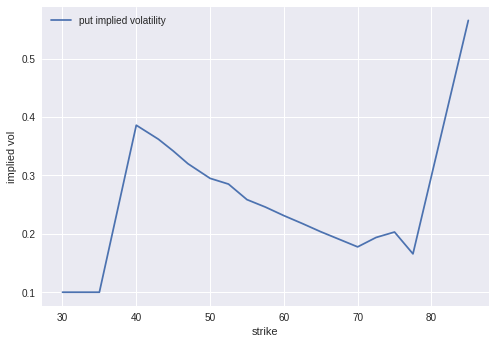

In [49]:
plt.plot(call_option_data1['Strike'],data3,label='put implied volatility')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend()

In [37]:
#data4=[]
#for i in range(len(call_option_data1['Strike'])):
c=call_option_data1['Strike']
#c=np.array(c)
data4 = np.log(67.58/(c*np.exp(-2.73263/100.0*T_1)))
#data4.append(b)
#print(c)
#print(data4)
data4  #type(c) shift+enter


0     0.822371
1     0.668221
2     0.534689
3     0.462369
4     0.416906
5     0.373421
6     0.311546
7     0.262756
8     0.216236
9     0.171784
10    0.129224
11    0.088402
12    0.049182
13    0.011441
14   -0.024926
15   -0.060018
16   -0.093919
17   -0.126709
18   -0.219082
Name: Strike, dtype: float64

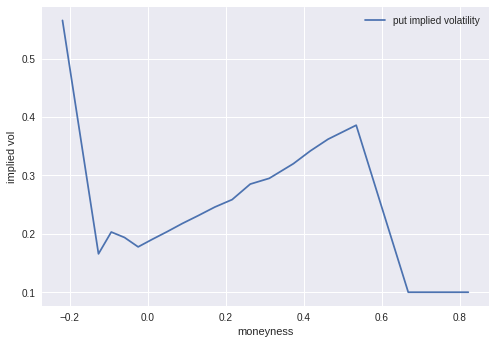

In [50]:
plt.plot(data4,data3,label='put implied volatility')
plt.ylabel('implied vol')
plt.xlabel('moneyness')
plt.legend()

In [45]:
d1 = (np.log(67.58 / c) + (2.73263/100.0 + 0.5 * 0.2089062500000004 ** 2) 
          * T_1) / (0.2089062500000004 * np.sqrt(T_1)) #0.2089062500000004 is calibrated volatility
data5=ss.norm.cdf(d1)
data5

array([1.        , 0.99999994, 0.99998891, 0.99988183, 0.99955218,
       0.99856649, 0.99375863, 0.98286936, 0.96024258, 0.92016657,
       0.85851283, 0.7747876 , 0.67301854, 0.56095346, 0.44798083,
       0.34275949, 0.25148413, 0.17721687, 0.04970052])

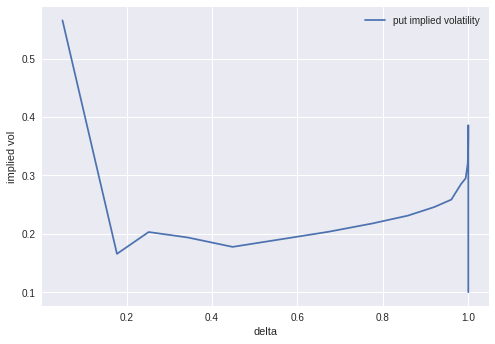

In [51]:
plt.plot(data5,data3,label='put implied volatility')
plt.ylabel('implied vol')
plt.xlabel('delta')
plt.legend()

In [0]:

'''==========
define a method for error function
============'''

def error_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  err1 = 0
  for i in np.arange(len(option_list)):
    err1 = err1 + ((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2    
  return err1

In [0]:
'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option_list), disp = 0)[0]

In [44]:

# Take options of 2-mon maturity
filter1 = list(filter(lambda x: x.maturity == T_1, option_list))
calibrated_volatility1 = bsm_calibration(gbm1, filter1)
print('>>>>>>>> calibrated_volatility is ' + str(calibrated_volatility1))

>>>>>>>> calibrated_volatility is 0.2089062500000004


In [47]:
gbm1.vol_ratio = calibrated_volatility1

#find calibrated option price
filter1_calibrated_price = [gbm1.bsm_price(filter1[i]) for i in range(len(filter1))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
filter1_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[5.6005603443918855e-11,
 9.87309450556089e-08,
 2.1170348494409913e-05,
 0.0002545327080778984,
 0.0010478330156528555,
 0.0036509081466810506,
 0.018124343558196865,
 0.05571903534017841,
 0.14541235015208454,
 0.32966944288319766,
 0.6623259720995875,
 1.1997021488238975,
 1.988925525089833,
 3.057900497826836,
 4.41052282878087,
 6.028165480225461,
 7.875896699466573,
 9.91061748380816,
 16.723865050835656]

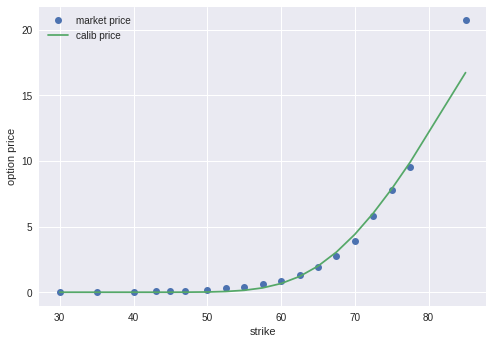

In [48]:

x_co = [filter1[i].strike for i in range(len(filter1))]
y_co = [filter1[i].market_price for i in range(len(filter1))]
plt.plot(x_co, y_co, 'o', label='market price')

y_co = filter1_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike')
plt.legend();

In [32]:
strike

NameError: ignored